# Value at Risk (VaR) and Expected Shortfall (ES) for 20 assets

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

We start by getting the historical data of 20 assets, and calculating the daily returns of each.

In [3]:
"""
Apple Inc. : AAPL
Microsoft Corporation : MSFT
Amazon.com Inc. : AMZN
Alphabet Inc. (Google) : GOOGL
Facebook Inc. : META
Tesla Inc. : TSLA
Berkshire Hathaway Inc. : BRK-A
JPMorgan Chase & Co. : JPM
Johnson & Johnson : JNJ
Visa Inc. : V
Walmart Inc. : WMT
Procter & Gamble Company : PG
Mastercard Incorporated : MA
The Coca-Cola Company : KO
Netflix Inc. : NFLX
Pfizer Inc. : PFE
NVIDIA Corporation : NVDA
The Home Depot Inc. : HD
The Walt Disney Company : DIS
Bank of America Corporation : BAC
"""
assets = ["AAPL", "MSFT", "AMZN", "GOOGL", "META","TSLA", "NVDA", "INTC", "AMD", "NFLX",
    "PYPL", "ADBE", "CSCO", "CMCSA", "PEP","AVGO", "TXN", "QCOM", "TMUS", "COST"]

df_symbol = pd.DataFrame({'Symbol': assets})

#dataframe containing the daily yields
data = pd.DataFrame()

for symbol in df_symbol['Symbol']:
    d = yf.download(symbol, "2021-01-01", "2023-10-29")
    data[symbol] = (d['Close'] - d['Open']) / d['Open']

#print(data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

First point: Find the composition of the portfolio minimizing its variance.
$$\text{Var}(R_p) = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_i \sigma_j \rho_{ij}$$
With :
- $n$ number of assets;
- \( $w_i$ \) et \( $w_j$ \) the weights of the assets;
- \( $\sigma_i$ \) et \( $\sigma_j$ \) assets volatility;
- \( $\rho_{ij}$ \) is the correlation between asset yields.

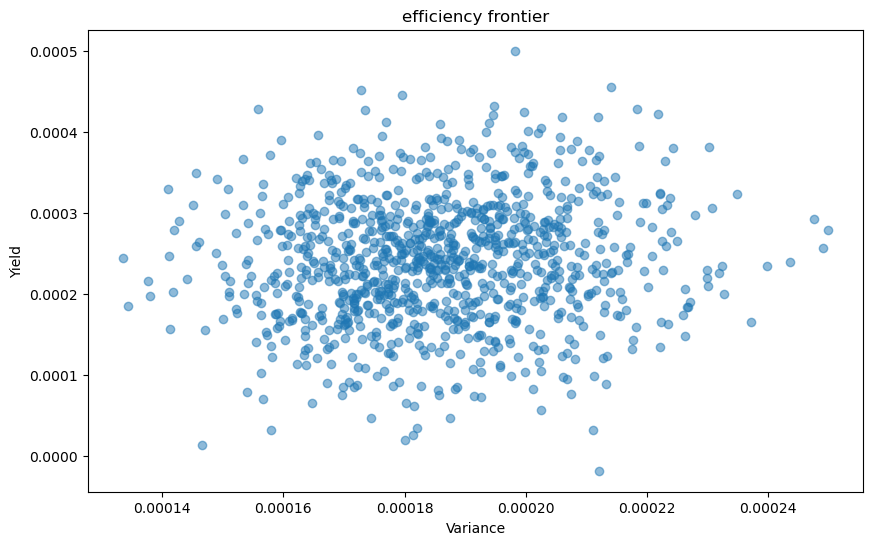

Weight of optimal portfolio: [0.03796134 0.14314178 0.00291575 0.03859208 0.00078766 0.03197707
 0.02668281 0.10854488 0.04482545 0.00637736 0.01450772 0.0225987
 0.07507943 0.05558804 0.0471029  0.00311377 0.12966631 0.00835074
 0.13529661 0.06688959]


In [8]:
yields = data.values.T

# Generate random weights for each asset in each combination
nb_combination = 1000
weight = np.random.random((len(assets), nb_combination))
weight = weight / np.sum(weight, axis=0)

# Calculate yield and variance for each weight combination
yield_portfolio = np.dot(yields.T, weight)
variance_portfolio = np.var(yield_portfolio, axis=0)

# plot the efficiency frontier
plt.figure(figsize=(10, 6))
plt.scatter(variance_portfolio, yield_portfolio.mean(axis=0), alpha=0.5)
plt.xlabel('Variance')
plt.ylabel('Yield')
plt.title('efficiency frontier')
plt.show()

# Find the portfolio with minimum variance
indice_portfolio_optimal = np.argmin(variance_portfolio)
portfolio_optimal = weight[:, indice_portfolio_optimal]
print("Weight of optimal portfolio:", portfolio_optimal)

Second point: find the composition of the portfolio minimizing the Value at Risk (VaR).

In [14]:
yield_portfolio_sorted = np.sort(yield_portfolio, axis=0)
df_yield = pd.DataFrame(yield_portfolio_sorted, columns=[f"Strategy_{i+1}" for i in range(nb_combination)])
#print(df_yield)

# Calculate the number of values to keep for each strategy (5% of days)
nb_days = yield_portfolio_sorted.shape[0]
nb_worst_values = int(0.05 * nb_days)

# Select the 5% worst values for each strategy
worst_yield_strategy = df_yield[:nb_worst_values][df_yield[:nb_worst_values] < 0]
#print(worst_yield_strategy)

# Calculate the VaR for each strategy (maximum of each column)
VaR_strategy = np.abs(worst_yield_strategy.max(axis=0))
#print("Value at Risk (VaR) for each strategy :")
#print(VaR_strategy)

VaR_portefolio = VaR_strategy.min()
print("VaR of portfolio = ", VaR_portefolio)

index_strategy_min_VaR = np.argmin(VaR_strategy)
strategy_min_VaR = weight[:, index_strategy_min_VaR]

print("Strategy minimizing VaR :", strategy_min_VaR)

VaR of portfolio =  0.01815434091744624
Strategy minimizing VaR : [0.03796134 0.14314178 0.00291575 0.03859208 0.00078766 0.03197707
 0.02668281 0.10854488 0.04482545 0.00637736 0.01450772 0.0225987
 0.07507943 0.05558804 0.0471029  0.00311377 0.12966631 0.00835074
 0.13529661 0.06688959]


Third point: find the composition of the portfolio minimizing the Expected ShortFall (ES).

In [18]:
# Calculate the ES for each strategy
ES_strategy = np.abs(worst_yield_strategy.mean(axis=0))

#print("Expected Shortfall (ES) for each strategy :")
#print(ES_strategy)

ES_portfolio = ES_strategy.min()
print("portfolio's ES = ", ES_portfolio)

index_strategy_min_ES = np.argmin(ES_strategy)
strategy_min_ES = weight[:, index_strategy_min_ES]

print("Strategy minimizing ES :", strategy_min_ES)

portfolio's ES =  0.025385650122253356
Strategy minimizing ES : [0.03796134 0.14314178 0.00291575 0.03859208 0.00078766 0.03197707
 0.02668281 0.10854488 0.04482545 0.00637736 0.01450772 0.0225987
 0.07507943 0.05558804 0.0471029  0.00311377 0.12966631 0.00835074
 0.13529661 0.06688959]
